In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras

In [13]:
data_train = pd.read_csv('./used_car_train_20200313.csv',sep=' ')
data_test = pd.read_csv('./used_car_testB_20200421.csv', sep=' ')
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [14]:
data_train.replace(to_replace='-',value=np.nan,inplace=True)
data_test.replace(to_replace='-',value=np.nan,inplace=True)
# 中位数填充缺失值
data_train.fillna(data_train.median(),inplace=True)
data_test.fillna(data_test.median(),inplace=True)

In [15]:
# 特征字段
tags = data_train.columns.tolist()
tags.remove('price')
print(tags)
# 改进点：去掉不重要的字段保留如下字段
# 'regDate','model','brand','bodyType','fuelType','power','kilometer','notRepairedDamage','creatDate',所有v
for col in []:
    tags.remove(col)

['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']


In [16]:
data_train[tags].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              150000 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           150000 non-null  float64
 6   fuelType           150000 non-null  float64
 7   gearbox            150000 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  v_0                150000 non-null  float64
 16  v_

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64
********************
count    150000.000000
mean        116.860973
std          70.075256
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         600.000000
Name: power, dtype: float64


D:\program\anaconda3-2020.2\envs\TF2.1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


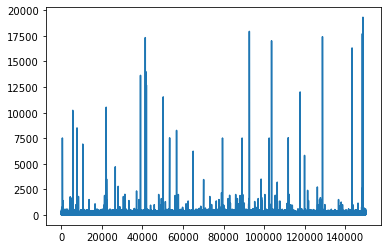

In [17]:
# 处理异常数据
data_train['power'].plot()
print(data_train['power'].describe())
# 题目要求发动机功率：范围 [ 0, 600 ]
print('*'*20)
data_train['power'][data_train['power']>600] = 600
print(data_train['power'].describe())

In [19]:
# # 特征值规范化
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(data_train[tags].values)
# x_train = min_max_scaler.transform(data_train[tags].values)
# x_test = min_max_scaler.transform(data_test[tags].values)

sds = StandardScaler()
sds.fit(data_train[tags].values)
x_train = sds.transform(data_train[tags].values)
x_test = sds.transform(data_test[tags].values)

In [20]:
# 获得y值
y = data_train['price'].values
# 数据集切分
train_x, test_x, train_y, test_y = train_test_split(x_train,y,test_size=0.2)

In [21]:
# 改进点：神经元个数；减小层数epoch->减小过拟合
# 搭建模型
model = keras.Sequential([
    #全连接层：`tf.keras.layers.Dense(神经元个数，activation= "激活函数“，kernel_regularizer=哪种正则化)`
    # 输入的维度是特征的维度
    keras.layers.Dense(250, activation='relu',input_shape=[len(tags)]),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    # If you don't specify anything, no activation is applied
    keras.layers.Dense(1)
])
# 定义损失函数，优化器
model.compile(loss='mean_absolute_error',optimizer='Adam')
# 模型训练
model.fit(train_x,train_y,batch_size=4096,epochs=200)

Epoch 1/200
30/30 [==============================] - 1s 15ms/step - loss: 5926.4319
Epoch 2/200
30/30 [==============================] - 0s 16ms/step - loss: 5522.4712
Epoch 3/200
30/30 [==============================] - 0s 15ms/step - loss: 3495.3138
Epoch 4/200
30/30 [==============================] - 0s 15ms/step - loss: 1641.1950
Epoch 5/200
30/30 [==============================] - 0s 15ms/step - loss: 1462.6167 0s - loss: 1464.46
Epoch 6/200
30/30 [==============================] - 0s 16ms/step - loss: 1396.1484
Epoch 7/200
30/30 [==============================] - 0s 15ms/step - loss: 1317.9408
Epoch 8/200
30/30 [==============================] - 0s 15ms/step - loss: 1276.9168
Epoch 9/200
30/30 [==============================] - 0s 15ms/step - loss: 1228.5432
Epoch 10/200
30/30 [==============================] - 0s 15ms/step - loss: 1179.9362
Epoch 11/200
30/30 [==============================] - 0s 16ms/step - loss: 1144.4610
Epoch 12/200
30/30 [==============================] - 1

30/30 [==============================] - 0s 16ms/step - loss: 461.3061
Epoch 194/200
30/30 [==============================] - 1s 17ms/step - loss: 462.8004
Epoch 195/200
30/30 [==============================] - 0s 16ms/step - loss: 465.5290
Epoch 196/200
30/30 [==============================] - 0s 16ms/step - loss: 461.1556
Epoch 197/200
30/30 [==============================] - 0s 16ms/step - loss: 463.3684
Epoch 198/200
30/30 [==============================] - 0s 16ms/step - loss: 461.3173
Epoch 199/200
30/30 [==============================] - 0s 16ms/step - loss: 466.2376
Epoch 200/200
30/30 [==============================] - 0s 17ms/step - loss: 469.1053


In [22]:
# 模型评估（训练集，验证集）
print('训练集MAE：',mean_absolute_error(train_y, model.predict(train_x)))
print('测试集MAE：',mean_absolute_error(test_y, model.predict(test_x)))

训练集MAE： 463.47153785470573
测试集MAE： 484.29900523518324


In [11]:
# 模型预测
predict_y = model.predict(x_test)
# 输出结果
result = pd.DataFrame()
result['SaleID'] = data_test.SaleID
result['price'] = predict_y
result.to_csv('./ans_nn.csv', index=False)